##PCA(principal component analysis)

-> dimensionality reduction의 대표적인 알고리즘 PCA

-> PCA는 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다.
-> 분산은 데이터가 널리 퍼져있는 정도.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-12-03 11:46:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-12-03 11:46:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-12-03 11:46:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
print(pca.components_.shape)

(50, 10000)


In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

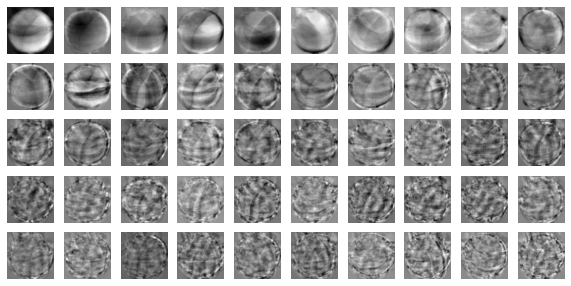

In [11]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [12]:
print(fruits_2d.shape)

(300, 10000)


In [14]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


##PCA으로 Dimention reduction

비지도 학습 문제 중 하나인 차원 축소에 대해 알아보았다.
차원 축소를 사용하면 데이터셋의 크기를 줄일 수 있고 비교적 시각화하기 쉽다.
또 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련 속도를 빠르게 만들 수 있다.

사이킷런의 PCA 클래스를 사용해 과일 사진 데이터의 특성을 50개로 크게 줄였다. 특성 개수는 작지만 변환된 데이터는 원본 데이터에 있는 분산의 90% 이상을 표현한다. 이를 설명된 분산이라 부른다.

PCA 클래스는 자동으로 설명된 분산을 계산하여 제공해 준다. 또한 주성분의 개수를 명시적으로 지정하는 대신 설명된 분산의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.

PCA 클래스는 변환된 데이터에서 원본 데이터를 복원하는 메서드도 제공한다. 변환된 데이터가 원본 데이터의 분산을 모두 유지하고 있지 않다면 완벽하게 복원되지 않는다. 하지만 적은 특성으로도 상당 부분의 디테일을 복원할 수 있다.

